<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Optimization</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Homework 8

- Utilize `scipy.optimize.root()` to implement a function that computes the inverse of an arbitrary square matrix.

- Hint: Use the `reshape()` method of the NumPy array to reshape a matrix into a vector and vice versa.

In [1]:
import numpy as np
from numpy.random import random
from scipy.linalg import inv
import homework.hw8 as hw8

n = 10
a = random(n*n).reshape((n,n)) # random matrix

np.allclose(hw8.inv(a), inv(a)) # validate function

True

# Unconstrained Optimization
- Find a minimum of the _objective function_ $f(\mathbf{x})$ for $\mathbf{x}\in\mathbb{R}^n$.
    - Usually a local minimum is found. The global minimum can be difficult to achieve.
    - Change $f$ to $-f$ if a maximum of $f$ is desired.
    
- If $f$ is continuously differentiable, a local minimum point $\mathbf{x}_*$ must also be a _critical point_ where
$$\boldsymbol{\nabla} f(\mathbf{x})=\mathbf{0}.$$
    - A critical point can be a minimum, a maximum, or a saddle point.



- If $f$ is twice continuously differentiable, its _Hessian matrix_ $\mathbf{H}_f$ is defined by
$$ [\mathbf{H}_{f}(\mathbf{x})]_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}.$$
    - A critical $\mathbf{x}_*$ is a local minimum if $\mathbf{H}_f(\mathbf{x}_*)$ is positive definite, i.e. $\mathbf{v}^T\mathbf{H}_f(\mathbf{x}_*)\mathbf{v}>0$ for arbitary $\mathbf{v}\in\mathbb{R}^n$.

# 1D Minimization

- A real-valued function $f(x)$ is _unimodal_ on interval $[a,b]$ if there exists a point $x_*\in[a,b]$ such that $f$ is strictly decreasing on $[a, x_*]$ and strictly increasing on $[x_*, b]$.

- Let $x_1<x_2$ be two points in $[a, b]$. If $f$ is unimodal on $[a,b]$, then $x_*\in[a, x_2]$ if $f(x_1)< f(x_2)$ and $x_*\in[ x_1, b]$ if $f(x_1)> x_2$. Repeat the above process by computing a new point in each iteration.

- In _golden section search_, $x_1$ and $x_2$ are chosen to be at the relative positions $1-\tau$ and $\tau$, respectively, where $\tau=(\sqrt5-1)/2$ is the inverse of the golden ratio. If the next interval is $[a, x_2]$, then $x_1$ is at the relative position $\tau$ of the new interval, and a new point $x_3$ is chosen to be at relative position $1-\tau$. Similar choice is done for the other scenario.
    - At each iteration, the interval shrinks by a factor of $\tau\approx0.618$.
    

- 1D minimization can be done by [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html).

In [2]:
from scipy.optimize import minimize_scalar

# objective function: f(x) = 1/2 - x exp(-x^2)
f = lambda x: 0.5 - x * np.exp(-x**2)
x1 = 1; x2 = 2 # initial guess
sol = minimize_scalar(f, bracket=(x1, x2), method='golden')
sol

     fun: 0.07111805751964662
    nfev: 44
     nit: 39
 success: True
       x: 0.7071067789659319

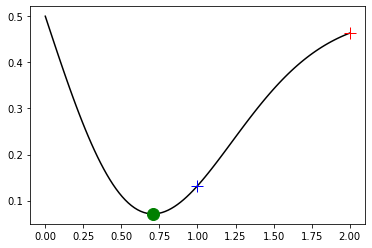

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)
plt.plot(x, f(x), '-k')
plt.plot(x1, f(x1), '+b', markersize=12)
plt.plot(x2, f(x2), '+r', markersize=12)
plt.plot(sol.x, f(sol.x), 'og', markersize=12)

- Golden section search is safe but slow (linear convergence).

- From $0=f'(x_*)\approx f'(\hat{x})+(x_*-\hat{x})f''(\hat{x})$ one obtains _Newton's method_ which has the iteration scheme
$$x_{k+1} = x_k - f'(x_k)/f''(x_k).$$
    - Newton's method converges quadratically but must be started from close to $x_*$.
    - It needs both $f'$ and $f''$.
    
- Combination of the golden search and the inverse parabolic interpolation is safe and does not need any derivative.

In [4]:
minimize_scalar(f, bracket=(x1, x2), method='brent')

     fun: 0.07111805751964662
    nfev: 15
     nit: 11
 success: True
       x: 0.7071067823652191

# Multi-D Optimization

- Optimization with $n>1$ variables can be achieved through the [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function in `scipy.optimize`.

- _Nelder-Mead_ method forms a simplex with $n+1$ points in $\mathbb{R}^n$ and keeps transforming the simplex by replacing the worst point.
![Nelder-Mead](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Nelder-Mead_Rosenbrock.gif/480px-Nelder-Mead_Rosenbrock.gif)
(Figure Credit: WikiMedia)

In [5]:
from scipy.optimize import minimize

# objective function: f(z0, z1) = z0^2 + z1^4
f = lambda z: z[0]**2 +  z[1]**4
x0 = [1, 1] # initial guess
minimize(f, x0, method='Nelder-Mead')

 final_simplex: (array([[-4.93049219e-09,  7.09545764e-05],
       [ 1.55846617e-08,  8.98347893e-05],
       [ 2.42594018e-08, -1.56738268e-05]]), array([4.96564662e-17, 3.08011251e-16, 5.88578930e-16]))
           fun: 4.965646624754787e-17
       message: 'Optimization terminated successfully.'
          nfev: 111
           nit: 60
        status: 0
       success: True
             x: array([-4.93049219e-09,  7.09545764e-05])

- The _steepest descent method_ tries to minimize along the local direction of steepest descent in every iteration 
$$\mathbf{x}_{k+1} = \mathbf{x}_k - \boldsymbol{\alpha}_k\cdot\boldsymbol{\nabla}f(\mathbf{x}_k),$$ 
where $\boldsymbol{\alpha}_k$ is the _line search_ parameter.
    - Steepest desccent is reliable but can be myopic. The overall convergence rate is linear.


- Multi-D _Newton's method_ generalizes the 1D method with 
$$\mathbf{x}_{k+1} = \mathbf{x}_k - \mathbf{H}_f^{-1}(\mathbf{x}_k)\boldsymbol{\nabla}f(\mathbf{x}_k).$$
    - Newton's method converges quadratically if it is started from close to the solution.
    - It requires both the first and second derivatives of $f$.


- Quasi-Newton methods such as _BFGS_ and _conjugate gradient (CG)_ methods use approximate gradient and Hessian matrix and converge superlinearly.

In [6]:
minimize(f, x0, method='BFGS')

      fun: 1.3417881617021954e-08
 hess_inv: array([[4.98766299e-01, 1.78466196e-11],
       [1.78466196e-11, 3.01472007e+02]])
      jac: array([-6.66133815e-16,  4.98682191e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([-7.45058096e-09,  1.07626939e-02])

In [7]:
minimize(f, x0, method='CG')

     fun: 5.765956800296951e-11
     jac: array([-2.33503462e-06,  8.21908404e-08])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 10
    njev: 23
  status: 0
 success: True
       x: array([-1.17496789e-06,  2.73896592e-03])

In [8]:
# gradient of f
df = lambda x: np.array([2*x[0], 4*x[1]**3])

minimize(f, x0, method='Newton-CG', jac=df)

     fun: 1.123854350328427e-09
     jac: array([-7.90302372e-10,  7.76412492e-07])
 message: 'Optimization terminated successfully.'
    nfev: 14
    nhev: 0
     nit: 13
    njev: 33
  status: 0
 success: True
       x: array([-3.95151186e-10,  5.78998592e-03])

# Nonlinear Least Squares

- _Nonlinear least squares_ is used to find the best fit nonlinear function $f(t,\mathbf{x})$ of model parameters $\mathbf{x}$ for given data $(t_i, y_i)$ ($i=0,1,\ldots, m$). This is achieved by minimize $\phi(\mathbf{x}) = \mathbf{r}^T(\mathbf{x})\mathbf{r}(\mathbf{x})/2 $, where $r_i(\mathbf{x}) = y_i - f(t_i, \mathbf{x}) $ is the _residue function_.

- Using Newton's method, one solves the step $\mathbf{s}_k = \mathbf{x}_{k+1}-\mathbf{x}_k $ from
$$
\left[\mathbf{J}^T(\mathbf{x}_k) \mathbf{J}(\mathbf{x}_k)
+ \sum_{i=1}^m r_i(\mathbf{x}_k)\mathbf{H}_i(\mathbf{x}_k)  \right]
\mathbf{s}_k = -\mathbf{J}^T (\mathbf{x}_k) \mathbf{r}(\mathbf{x}_k),
$$
where $\mathbf{J} (\mathbf{x})$ is the Jacobian of $\mathbf{r}(\mathbf{x})$, and $\mathbf{H}_i(\mathbf{x})$ is the Hessian matrix of $r_i(\mathbf{x})$.


- Dropping the second term order term (which is small but expensive to compute), one obtains $\mathbf{J}^T (\mathbf{x}_k) \mathbf{J} (\mathbf{x}_k) \mathbf{s}_k = -\mathbf{J}^T (\mathbf{x}_k) \mathbf{r}(\mathbf{x}_k)$, which is just the normal equation for the linear least squares problem:
$$\mathbf{J} (\mathbf{x}_k) \mathbf{s}_k \simeq - \mathbf{r}(\mathbf{x}_k).$$
In other words, one can solve a linear least squares problem in each Newton's step and repeat the process until the residue is small.

- Nonlinear least squares problem can be solved by the [`least_squares()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) function in `scipy.optimize`.

In [9]:
from scipy.optimize import least_squares

# base function: w(t, z0, z1) = t^z0 * exp(-z1*t) 
w = lambda t, z: t**z[0] * np.exp(-z[1]*t)

# generate noisy data
t = np.linspace(0, 3, 100)
y = w(t, [2, 3]) + 0.01*(random(len(t))-0.5) # noisy data

# residue function
res = lambda x, t, y: y - w(t, x)

x0 = [0, 0] # initial guess
sol = least_squares(res, x0, args=(t, y))
sol.success, sol.x

(True, array([1.98056469, 3.00779845]))

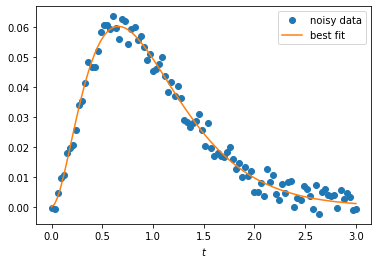

In [10]:
plt.plot(t, y, 'o', label='noisy data')
plt.plot(t, w(t, sol.x), label='best fit')
plt.xlabel('$t$')
plt.legend()
plt.show()

# Constrained Optimization

- Find a minimum of $f(\mathbf{x})$ subject to $\mathbf{g}(\mathbf{x})=\mathbf{0}$ and/or $\mathbf{h}(\mathbf{x})\leq\mathbf{0}$, where $\mathbf{g}: \mathbb{R}^n\rightarrow\mathbb{R}^m$, and $\mathbf{h}:\mathbb{R}^n\rightarrow\mathbb{R}^p$.

- Let $L(\mathbf{x}, \boldsymbol{\lambda})= f(\mathbf{x}) + \boldsymbol{\lambda}^T \mathbf{g}(\mathbf{x})$ be the _Lagrangian function_ for the optimization problem with an equality constraint, where $\boldsymbol{\lambda}$ is the vector of Lagrangian multipliers. A minimum point $(\mathbf{x}_*, \boldsymbol{\lambda}_*)$ must also be a critical point of $L$:
$$
\boldsymbol{\nabla}L(\mathbf{x}_*, \boldsymbol{\lambda}_*)
=\begin{bmatrix}
\boldsymbol{\nabla}_{\mathbf{x}} f(\mathbf{x}_*) + \mathbf{J}^T_{\mathbf{g}}(\mathbf{x}_*)\boldsymbol{\lambda_*} \\
\mathbf{g}(\mathbf{x}_*)
\end{bmatrix} = \mathbf{0},
$$
where $\mathbf{J}_{\mathbf{g}}(\mathbf{x})$ is the Jacobian of $\mathbf{g}$.


- The Hessian of $L$ is
$$ 
\mathbf{H}_L (\mathbf{x}, \boldsymbol{\lambda})
= \begin{bmatrix}
\mathbf{B} (\mathbf{x}, \boldsymbol{\lambda}) & 
\mathbf{J}^T_{\mathbf{g}}(\mathbf{x}) \\
\mathbf{J}_{\mathbf{g}}(\mathbf{x}) & \mathbf{0}
\end{bmatrix},
$$
where 
$$
\mathbf{B} (\mathbf{x}, \boldsymbol{\lambda})
=\mathbf{H}_f (\mathbf{x}) + \sum_{i=1}^m \lambda_i \mathbf{H}_{g_i}(\mathbf{x}).
$$ 
A critical point $(\mathbf{x}_*, \boldsymbol{\lambda}_*)$ is also a constrained minimum if $\mathbf{B}(\mathbf{x}_*, \boldsymbol{\lambda}_*)$ is positive definite in the null space of $\mathbf{J}_{\mathbf{g}}(\mathbf{x}_*)$ (the vectors from which are all orthogonal to the row vectors of $\mathbf{J}_{\mathbf{g}}(\mathbf{x})$).

- An inequality constraint $\mathbf{h}(\mathbf{x})\leq\mathbf{0}$ can be treated similarly with postive multipliers where the constraints are _active_ ($h_i(\mathbf{x})=0$) and $\lambda_i=0$  where the constraints are _inactive_ (i.e. $h_i(\mathbf{x})<0$).

- The domain of the optimization variables can be implemented as [`Bounds`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html).

In [11]:
# f(z0, z1) = z0^2 + z1^4
f = lambda z: z[0]**2 +  z[1]**4

bounds = [(-1, 1), (0.5, 1)] # ranges of x1 and x2
x0 = [0, 0.7] # initial guess
minimize(f, x0, bounds=bounds)

      fun: 0.06250000000000004
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.77555756e-09,  5.00000015e-01])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-6.04187257e-09,  5.00000000e-01])

- A linear constraint of the optimization variables can be implemented by [`LinearConstraint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html).

In [12]:
from scipy.optimize import LinearConstraint

# constraint: z0 - z1 == 1
c = LinearConstraint(np.array([1, -1]), lb=1, ub=1)
minimize(f, x0, constraints=c)

     fun: 0.2892734277739214
     jac: array([ 0.82042048, -0.82063809])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.41021024, -0.58978976])

- A nonlinear constraint of the optimization variables can be implemented by [`NonlinearConstraint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html).

In [13]:
from scipy.optimize import NonlinearConstraint

# constraint: z0^2 - z1 >= 1 
c = NonlinearConstraint(lambda x: x[0]**2 - x[1], lb=1, ub=np.inf)
minimize(f, x0, constraints=c)

     fun: 1.0000000000000036
     jac: array([ 2.98023224e-08, -3.99999991e+00])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 4.03389992e-09, -1.00000000e+00])

# Save and Load Data
- NumPy arrays can be saved and loaded in the text format using `numpy.savetxt()` and `numpy.loadtxt()`.

In [14]:
import numpy as np
data = np.empty((100, 2)) # a 100x2 empty array
data[:,0] = np.linspace(0, 10, 100) # 100 points in [0, 10]
data[:,1] = np.sin(data[:,0])
np.savetxt('data.txt', data)

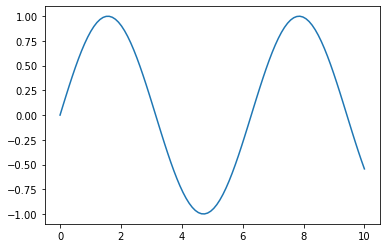

In [15]:
import matplotlib.pyplot as plt
data2 = np.loadtxt('data.txt') # lines starting with # are ignored
plt.plot(data2[:,0], data2[:,1])
plt.show()

- Numpy arrays can also be saved and loaded in the binary format using `numpy.savez()` and `numpy.load()`.

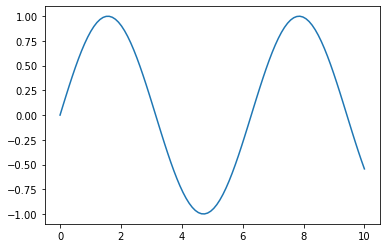

In [16]:
np.savez('data.npz', x=data[:,0], sinx=data[:,1]) # save the data with keys
data3 = np.load('data.npz') # load data as a dictionary
plt.plot(data3['x'], data3['sinx']) 
plt.show()

# Homework 9

- Write a function to determine the height and radius of the cylinder that has the minimum surface area for a given volume.